In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import altair as alt

## Puntuación de los GPs

In [43]:
season3 = pd.read_csv('../data/Season3.csv', sep=',')
season3 = season3.drop(season3.index[-1])
season3 = season3.drop(columns=['China'])
season3.head()

,Pilotos,Zandvoort,Miami,Austria,Brasil,Bélgica,Baku,Imola,México,Catar,...,Singapur,Jeddah,Japón,Abu Dhabi,Mónaco,Hungría,Monza,Canada,COTA,Barcelona
0,A. Romero,26.0,27.0,29.0,25.0,33.0,26.0,26.0,24.0,37.0,...,26.0,24.0,37.0,38.0,14.0,23.0,14.0,25.0,26.0,25.0
1,E. Reig,22.0,20.0,40.0,0.0,31.0,42.0,20.0,25.0,40.0,...,18.0,26.0,30.0,36.0,25.0,25.0,41.0,22.0,18.0,18.0
2,A. Torres,21.0,22.0,33.0,23.0,38.0,35.0,22.0,18.0,22.0,...,27.0,20.0,34.0,32.0,5.0,18.0,26.0,18.0,22.0,22.0
3,A. Simón,18.0,16.0,7.0,14.0,27.0,23.0,20.0,20.0,33.0,...,21.0,16.0,4.0,8.0,21.0,20.0,34.0,20.0,20.0,NaN
4,F. Leiva,1.0,14.0,1.0,NaN,0.0,NaN,NaN,15.0,22.0,...,27.0,18.0,18.0,7.0,22.0,NaN,23.0,17.0,16.0,20.0


In [44]:
season2 = pd.read_csv('../data/Season2.csv', sep=',')
season2 = season2.drop(columns=['Puntos'])
season2.head()

,Pilotos,Mónaco,Potugal,México,Hungría,Las Vegas,China,Barcelona,Bahrein,Austria,...,Zandvoort,Singapur,Australia,Canada,Brasil,Arabia Saudí,Francia,Austin,Baku,Bélgica
0,V. Peraire,26.0,26.0,26.0,22.0,26.0,26.0,52.0,27.0,35.0,...,26.0,21.0,26.0,40.0,27.0,23.0,27.0,40.0,NaN,37.0
1,A. Romero,22.0,21.0,23.0,1.0,22.0,21.0,38.0,14.0,28.0,...,0.0,5.0,20.0,38.0,23.0,26.0,20.0,36.0,38.0,23.0
2,A. Torres,17.0,22.0,18.0,21.0,16.0,22.0,44.0,19.0,23.0,...,0.0,18.0,0.0,50.0,31.0,20.0,16.0,23.0,15.0,17.0
3,E. Reig,18.0,18.0,5.0,25.0,14.0,18.0,40.0,22.0,37.0,...,2.0,27.0,22.0,2.0,NaN,NaN,19.0,24.0,27.0,33.0
4,A. Simón,20.0,5.0,14.0,14.0,20.0,6.0,12.0,2.0,23.0,...,20.0,16.0,10.0,44.0,16.0,14.0,22.0,27.0,33.0,34.0


In [45]:
season1 = pd.read_csv('../data/Season1.csv', sep=',')
season1 = season1.drop(columns=['Puntos'])
season1.head()

,Pilotos,Bahrein,Arabia Saudí,Australia,Imola,Miami,Barcelona,Mónaco,Baku,Canada,...,Zandvoort,Monza,Portugal,Singapur,Suzuka,China,Austin,México,Brasil,Abu Dhabi
0,A. Torres,27.0,27.0,26.0,24.0,27.0,26.0,22.0,20.0,25.0,...,26.0,23.0,21.0,10.0,20.0,14.0,22.0,0.0,31.0,20.0
1,A. Simón,14.0,12.0,16.0,35.0,17.0,18.0,15.0,14.0,20.0,...,18.0,16.0,4.0,26.0,18.0,20.0,1.0,25.0,14.0,18.0
2,A. Romero,22.0,22.0,2.0,20.0,2.0,10.0,26.0,19.0,23.0,...,5.0,20.0,27.0,4.0,25.0,1.0,0.0,20.0,18.0,22.0
3,J. Muñoz,18.0,14.0,11.0,14.0,22.0,22.0,6.0,22.0,6.0,...,17.0,18.0,18.0,14.0,8.0,12.0,19.0,22.0,23.0,5.0
4,E. Reig,16.0,11.0,20.0,1.0,14.0,0.0,16.0,10.0,18.0,...,20.0,26.0,22.0,23.0,10.0,0.0,20.0,0.0,25.0,16.0


In [46]:
seasonsList = [season1, season2, season3]
seasonsList = [season.set_index('Pilotos') for season in seasonsList]
seasons = pd.concat(seasonsList, axis=1, join= "outer")

In [47]:
pilotos = seasons.index

In [48]:
pilotos=pilotos.to_list()

## Evolución del ELO

In [49]:
def actualizaElo(elo, resultados, K):
    nuevoElo = elo.copy()

    for piloto, puntos in resultados:
        R_piloto = elo[piloto]
        for piloto_vs, puntos_vs in resultados:
            if piloto==piloto_vs :
                continue
            R_piloto_vs = elo[piloto_vs]
            esperado = 1/(1+10**((R_piloto_vs-R_piloto)/400))
            diff_puntos = puntos-puntos_vs
            if diff_puntos>0:
                S = 1
            elif diff_puntos==0:
                S = 1/2
            else:
                S = 0
            nuevoElo[piloto] += K[piloto][1] * (S-esperado)
        K[piloto][0] += 1
    return nuevoElo

In [50]:
def actualizaEloPuntos(elo, resultados, K=20):
    nuevoElo = elo.copy()
    puntos_totales = sum([resultado[1] for resultado in resultados])
    Q_total = 0
    for piloto, puntos in resultados:
        Q_total += 10**(elo[piloto]/400)
    for piloto, puntos in resultados:
        R_piloto = elo[piloto]
        Q_piloto = 10**(R_piloto/400)
        esperado = puntos_totales*Q_piloto/Q_total
        nuevoElo[piloto] += K * (puntos-esperado)/esperado
    return nuevoElo

In [51]:
def evolucionElo(season, inicial_K = 20):
    n_carreras = season.shape[1]-1
    pilotos = season.index
    K_piloto = {piloto : [0, inicial_K] for piloto in pilotos}
    elo = {piloto: 1500 for piloto in pilotos}
    eloEvolucion = {piloto: [elo[piloto]] for piloto in pilotos}
    for i in range(n_carreras):
        resultados = list(season.iloc[:,i].dropna().items())
        elo = actualizaElo(elo, resultados, K_piloto)
        for piloto in pilotos:
            eloEvolucion[piloto].append(elo[piloto])
            # if K_piloto[piloto][0] >= periodo_prueba:
            #     K_piloto[piloto][1] /= 2
            
    return eloEvolucion

In [52]:
evoelo = evolucionElo(seasons, 5)

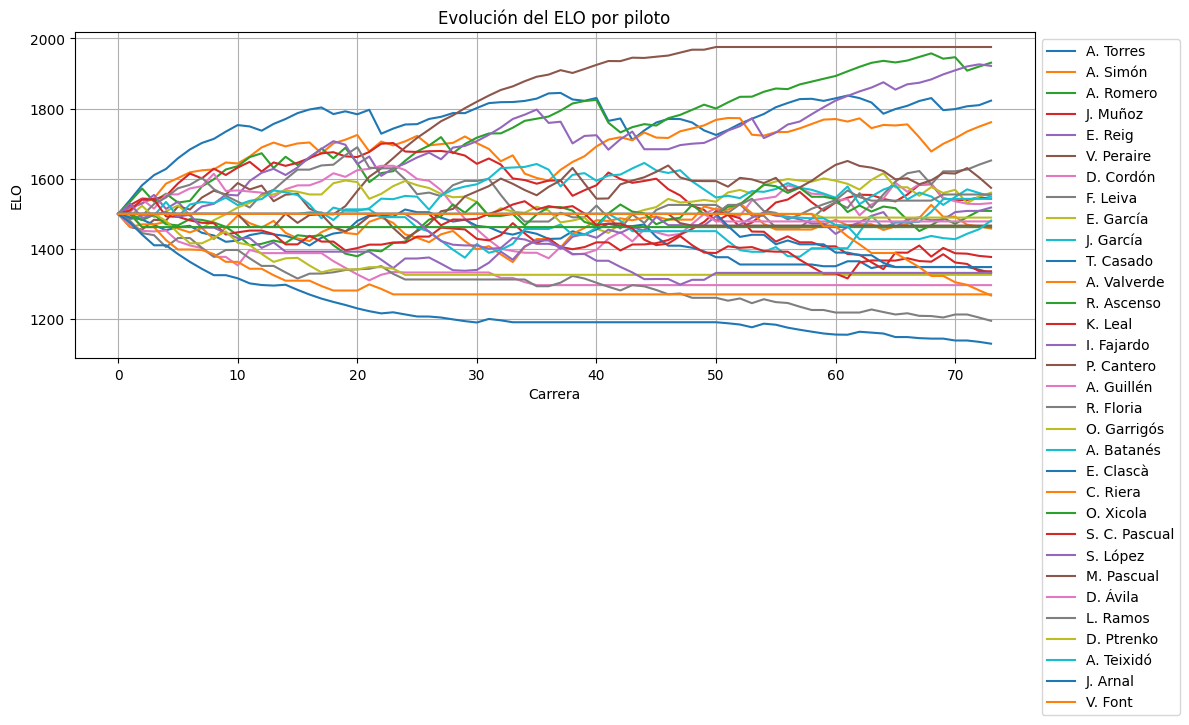

In [53]:
plt.figure(figsize=(12, 6))
Seleccion = ['A. Romero', 'A. Torres', 'E. Reig', 'A. Simón', 'E. García']
for piloto in pilotos:
    elos = evoelo[piloto]
    plt.plot(range(len(elos)), elos, label=piloto)

plt.xlabel("Carrera")
plt.ylabel("ELO")
plt.title("Evolución del ELO por piloto")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # leyenda fuera del gráfico
plt.tight_layout()
plt.grid(True)
plt.show()

In [54]:
num_carreras_piloto = seasons.notna().sum(axis=1)
pilotos_seleccion = num_carreras_piloto[num_carreras_piloto > 10].index

dataElos = []
for piloto, elos in evoelo.items():
    if piloto not in pilotos_seleccion:
        continue
    for carrera, elo in enumerate(elos):
        dataElos.append({
            'Piloto': piloto,
            'GP': carrera+1,
            'ELO': elo
        })
dataframeElos = pd.DataFrame(dataElos)

In [55]:
selector = alt.selection_point(fields=['Piloto'], bind='legend', toggle='true')

linea_temporada1 = alt.Chart(pd.DataFrame({'GP': [24]})).mark_rule(
    color='gray',
    strokeDash=[5, 5],
    size=2
).encode(
    x='GP:O'
)
linea_temporada2 = alt.Chart(pd.DataFrame({'GP': [50]})).mark_rule(
    color='gray',
    strokeDash=[5, 5],
    size=2
).encode(
    x='GP:O'
)
chart_base = alt.Chart(dataframeElos).mark_line().encode(
    x='GP:O',
    y=alt.Y('ELO:Q', scale=alt.Scale(domain=[1000,2000])),
    color='Piloto:N',
    opacity=alt.condition(selector, alt.value(1), alt.value(0.1))
).add_params(
    selector
)
tooltip = alt.Chart(dataframeElos).mark_point(
    opacity=0  # invisible
).encode(
    x='GP:O',
    y=alt.Y('ELO:Q', scale=alt.Scale(domain=[1000,2000])),
    color='Piloto:N',
    tooltip=['ELO:Q']
)

chart_final = (chart_base + linea_temporada1+linea_temporada2+tooltip).properties(
    width=1000,
    height=600,
    title='Evolución del Elo'
)
chart_final

alt.LayerChart(...)

## Maestros del agua

In [56]:
lluvia3 = [0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0]
lluvia3.reverse()
max3 = [28,28,32,28,39,42,28,28,42,28,28,52,28,28,42,28,39,42,28,28,42,28,28,28]
len(lluvia3) == len(max3)

True

In [57]:
lluvia2 = [0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
lluvia2.reverse()
puntosCarreras = {'0': 27, '1': 39, '2': 54}
tipoCarrera = [0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,2,1,0,0,1,1,1]
max2 = [puntosCarreras[str(tipo)] for tipo in tipoCarrera]
len(lluvia2) == len(max2)

True

In [58]:
lluvia1 = [0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0]
puntosCarreras = {'0': 27, '1': 39}
tipoCarrera = [0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0]
max1 = [puntosCarreras[str(tipo)] for tipo in tipoCarrera]
len(lluvia1) == len(max1)

True

In [59]:
lluvia = lluvia1+lluvia2+lluvia3
maxpuntos = max1+max2+max3
numGp = len(lluvia)

In [60]:
seasons_lluvia = seasons.iloc[:, np.array(lluvia) ==1]
maxpuntos_lluvia = [puntos for puntos, llueve in zip(maxpuntos, lluvia) if llueve == 1]

seasons_seco = seasons.iloc[:, np.array(lluvia) ==0]
maxpuntos_seco = [puntos for puntos, llueve in zip(maxpuntos, lluvia) if llueve == 0]

In [61]:
def porcentajePuntos(piloto):
    puntos = seasons.loc[piloto]
    puntosSum = 0
    totalSum = 0
    for i in range(len(maxpuntos)):
        if not pd.isna(puntos.iloc[i]):
            puntosSum += puntos.iloc[i]
            totalSum += maxpuntos[i]
    return puntosSum/totalSum

def porcentajePuntosLluvia(piloto):
    puntos = seasons_lluvia.loc[piloto]
    puntosSum = 0
    totalSum = 0
    for i in range(len(maxpuntos_lluvia)):
        if not pd.isna(puntos.iloc[i]):
            puntosSum += puntos.iloc[i]
            totalSum += maxpuntos_lluvia[i]
    if totalSum == 0:
        return False
    return puntosSum/totalSum

def porcentajePuntosSeco(piloto):
    puntos = seasons_seco.loc[piloto]
    puntosSum = 0
    totalSum = 0
    for i in range(len(maxpuntos_seco)):
        if not pd.isna(puntos.iloc[i]):
            puntosSum += puntos.iloc[i]
            totalSum += maxpuntos_seco[i]
    if totalSum == 0:
        return False
    return puntosSum/totalSum
        

In [63]:
porcentajePilotos = []
for piloto in pilotos:
    valorLluvia = porcentajePuntosLluvia(piloto)
    valorSeco = porcentajePuntosSeco(piloto)
    if valorLluvia and valorSeco:
        porcentajePilotos.append(
            {'Piloto': piloto,
            'Porcentaje': porcentajePuntos(piloto),
            'Condicion': 'Cualquiera'}
        )
        porcentajePilotos.append(
            {'Piloto': piloto,
            'Porcentaje': valorLluvia,
            'Condicion': 'Lluvia'}
        )
        porcentajePilotos.append(
            {'Piloto': piloto,
            'Porcentaje': valorSeco,
            'Condicion': 'Seco'}
        )
porcentajeDF = pd.DataFrame(porcentajePilotos)

In [72]:
pivot = porcentajeDF.pivot(index='Piloto', columns='Condicion', values='Porcentaje').reset_index()
pivot['Diferencia'] = pivot['Lluvia'] - pivot['Cualquiera']
pivot['DiferenciaSeco'] = pivot['Lluvia'] - pivot['Seco']
pivot['DiferenciaSeco_str'] = pivot['DiferenciaSeco'].apply(
    lambda x: f"+{x:.2%}" if x >= 0 else f"{x:.2%}"
)

orden = pivot.sort_values('Cualquiera', ascending=False)['Piloto']

In [73]:
pivot

Condicion,Piloto,Cualquiera,Lluvia,Seco,Diferencia,DiferenciaSeco,DiferenciaSeco_str
0,A. Batanés,0.239500,0.170732,0.251309,-0.068768,-0.080577,-8.06%
1,A. Guillén,0.081301,0.108844,0.072650,0.027543,0.036194,+3.62%
2,A. Romero,0.703559,0.715935,0.700695,0.012376,0.015241,+1.52%
3,A. Simón,0.570738,0.655889,0.550733,0.085151,0.105157,+10.52%
4,A. Teixidó,0.218905,0.285714,0.213904,0.066809,0.071811,+7.18%
5,A. Torres,0.690538,0.665127,0.696419,-0.025411,-0.031292,-3.13%
6,A. Valverde,0.225616,0.253205,0.220605,0.027589,0.032600,+3.26%
7,C. Riera,0.019324,0.025000,0.017007,0.005676,0.007993,+0.80%
8,D. Cordón,0.329290,0.436490,0.303402,0.107199,0.133087,+13.31%
9,E. Clascà,0.015922,0.023529,0.013921,0.007608,0.009608,+0.96%


In [66]:
color_scale = alt.Scale(
    domain=['Cualquiera', 'Lluvia'],
    range=['gray', 'blue']
)

# Líneas conectando los dos puntos por piloto
lineas = alt.Chart(porcentajeDF).mark_line().encode(
    x='Porcentaje:Q',
    y=alt.Y('Piloto:N', sort=orden.tolist()),
    detail='Piloto:N',
    color=alt.value('lightgray')  # líneas neutras sin leyenda
)

# Puntos con color según condición, genera la leyenda
puntos = alt.Chart(porcentajeDF).mark_circle(size=80).encode(
    x=alt.X('Porcentaje:Q', title='Porcentaje de puntos'),
    y=alt.Y('Piloto:N', sort=orden.tolist()),
    color=alt.Color('Condicion:N', scale=color_scale, legend=alt.Legend(title='Condición')),
    tooltip=['Piloto', alt.Tooltip('Condicion:N'), alt.Tooltip('Porcentaje:Q', title='% Puntos')]
)

# Texto con diferencia
texto = alt.Chart(pivot).mark_text(align='center', dy=10).encode(
    x='Lluvia:Q',
    y=alt.Y('Piloto:N', sort=orden.tolist()),
    text=alt.Text('Diferencia:Q', format='.2%'),
    color=alt.condition(
        'datum.Diferencia >= 0',
        alt.value('green'),
        alt.value('red')
    )
)

# Combinamos todo
chart = (lineas + puntos + texto).properties(
    title='Porcentaje de puntos en lluvia vs cualquiera'
)
chart

alt.LayerChart(...)

In [84]:
color_scale = alt.Scale(
    domain=['Seco', 'Lluvia'],
    range=['gray', 'blue']
)

# Líneas conectando los dos puntos por piloto
lineas = alt.Chart(porcentajeDF).mark_line().encode(
    x='Porcentaje:Q',
    y=alt.Y('Piloto:N', sort=orden.tolist()),
    detail='Piloto:N',
    color=alt.value('lightgray')  # líneas neutras sin leyenda
)

# Puntos con color según condición, genera la leyenda
puntos = alt.Chart(porcentajeDF).mark_circle(size=80).encode(
    x=alt.X('Porcentaje:Q', title='Porcentaje de puntos'),
    y=alt.Y('Piloto:N', sort=orden.tolist()),
    color=alt.Color('Condicion:N', scale=color_scale, legend=alt.Legend(title='Condición')),
    tooltip=['Piloto', alt.Tooltip('Condicion:N'), alt.Tooltip('Porcentaje:Q', title='% Puntos', format='.2f')]
)

# Texto con diferencia
texto = alt.Chart(pivot).mark_text(align='center', dy=10).encode(
    x='Lluvia:Q',
    y=alt.Y('Piloto:N', sort=orden.tolist()),
    text=alt.Text('DiferenciaSeco_str'),
    color=alt.condition(
        'datum.DiferenciaSeco >= 0',
        alt.value('green'),
        alt.value('red')
    )
)

# Combinamos todo
chart = (lineas + puntos + texto).properties(
    title='Porcentaje de puntos en lluvia vs seco',
)
chart

alt.LayerChart(...)

In [85]:
chart.save('lluvia.html')